In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
  import random
except:
  print("Installing Corresponing Dependencies")
  ! pip install -q qiskit pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
  import random

Dependencies are already installed. Skipping...


In [2]:
!rm -r modules

In [3]:
# import modules
import requests
from pathlib import Path
import os

directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)

helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py",
    "algorithms_utils.py":"https://github.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/raw/master/modules/utils/algorithms_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [4]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement
from modules.algorithms_utils import *

#  Deutsch Jozsa
All the algorithm's quantum circuit is built from scratch inside the function. It will be asummed the rest of my auxiliary dependencies are already imported for my final script.

In [5]:
def deutch_jozsa(qc,initialize_jozsa = True):
  """
  The function receibes a quantum circuit as parameter and implements the deutch josza algorithm.
  ***THE CIRCUIT MUST ME EMPTY***
  qc: quantum circuit instance
  initialize_jozsa: If set to true, the function assumes the qubits have not been initialized yet.
  """
  assert len(qc.qubits) == 2,"The quantum circuit must have only two qubits."
  num_qubits = len(qc.qubits)
  if initialize_jozsa:
    # initialize the quantum circuit
    initialize_quantum_circuit(qc,target_qubits = [1],hadamard=False)
    qc.barrier()
  # apply the initial hadamard gates
  for i in range(num_qubits):
    qc.h(i)
  qc.barrier()
  # fetch a random oracle
  oracle = random.randint(0,num_qubits+1)
  # instance a circuit to hold the oracle gate
  oracle_gate = QuantumCircuit(num_qubits)
  # create the corresponding function depending on whether the fase kickback is odd or even
  if(oracle == 0): # f_0(x) = 0
    pass
  elif(oracle == 1): # f(x) = x
    oracle_gate.cx(0,1)
  elif(oracle == 2): # f(x) = 1
    oracle_gate.cx(0,1)
    oracle_gate.x(0)
    oracle_gate.cx(0,1)
  else: # f(x) = x + 1
    oracle_gate.x(0)
    oracle_gate.cx(0,1)

  # transform the circuit into a quantum gate
  gate = oracle_gate.to_gate(label = "Oracle")
  qc.append(gate,[0,1])
  qc.barrier()

  # apply the initial hadamard gates
  for i in range(num_qubits):
    qc.h(i)
  qc.barrier()
  # make a quantum measurement
  for i in range(num_qubits):
    qc.measure(i,i)
  return qc



In [6]:
# seed for replication/experimentation
random.seed(23423)

In [7]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)


In [8]:
qc.x(0)

In [9]:
qc = deutch_jozsa(qc)

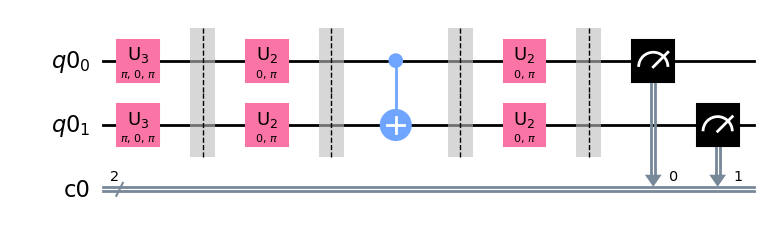

In [10]:
qc.decompose().draw("mpl")

In [11]:
backend = Aer.get_backend('statevector_simulator')

In [12]:
counts = ideal_qc_simulation(qc,backend,num_measurements = 1)

In [13]:
counts

{'10': 1}